<a href="https://colab.research.google.com/github/lovellbrian/ELEC4630/blob/master/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chollet  p105

On the other hand, if the network has limited memorization resources, it won’t be
able to learn this mapping as easily; thus, in order to minimize its loss, it will have to
resort to learning compressed representations that have predictive power regarding
the targets—precisely the type of representations we’re interested in. At the same
time, keep in mind that you should use models that have enough parameters that they
don’t underfit: your model shouldn’t be starved for memorization resources. There is
a compromise to be found between too much capacity and not enough capacity.
Unfortunately, there is no magical formula to determine the right number of layers
or the right size for each layer. You must evaluate an array of different architectures
(on your validation set, not on your test set, of course) in order to find the
correct model size for your data. The general workflow to find an appropriate model
size is to start with relatively few layers and parameters, and increase the size of the layers
or add new layers until you see diminishing returns with regard to validation loss.
Let’s try this on the movie-review classification network. The original network is
shown next.




In [3]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Now let’s try to replace it with this smaller network.

In [4]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.6811 - acc: 0.5392 - val_loss: 0.6400 - val_acc: 0.6336
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.6032 - acc: 0.7725 - val_loss: 0.5205 - val_acc: 0.8608
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.4743 - acc: 0.9003 - val_loss: 0.4359 - val_acc: 0.8790
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3855 - acc: 0.9139 - val_loss: 0.3773 - val_acc: 0.8854
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3206 - acc: 0.9243 - val_loss: 0.3437 - val_acc: 0.8820
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2744 - acc: 0.9272 - val_loss: 0.3150 - val_acc: 0.8870
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2382 - acc: 0.9355 - val_loss: 0.2917 - val_acc: 0.8916
Epoch 8/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2069 - a

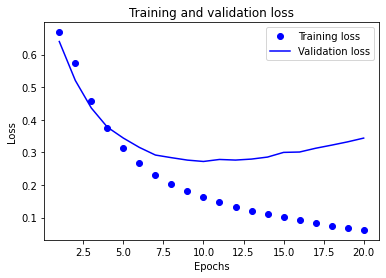

In [6]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

from keras import models
from keras import layers
# model = models.Sequential()
# model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
# model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()